<a href="https://colab.research.google.com/github/glazedonut/IEClusteingAnalysisProject/blob/master/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Roka Hosono, Veda Upasan Pedagadi, Jahnavi Chowdary Tumati
11/7/2022
Project 1: Cluster Analysis


Task 1:

C:\Users\hoson\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of Classes: 7
Adjusted Rand Score for  K means : 1.0
Normalized Mutual Info Score for  K means : 1.0
Adjusted Mutual Info Score for  K means : 1.0
Fowlkes Mallows Score for  K means : 1.0
Adjusted Rand Score for  Hierarchal Clustering : 1.0
Normalized Mutual Info Score for  Hierarchal Clustering : 1.0
Adjusted Mutual Info Score for  Hierarchal Clustering : 1.0
Fowlkes Mallows Score for  Hierarchal Clustering : 1.0


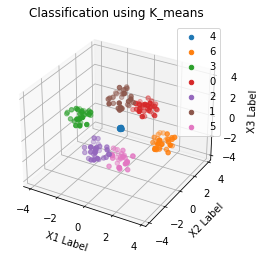

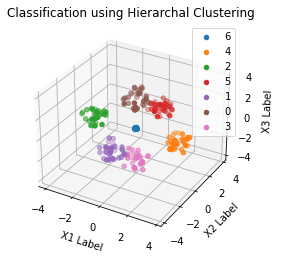

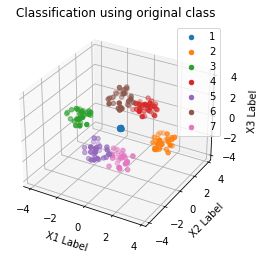

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score, adjusted_mutual_info_score, fowlkes_mallows_score
 
def create_K_meanselbow_task1(file): #K means classification
    data=pd.read_csv(file)
    coordinates=data[[data.columns[1],data.columns[2],data.columns[3]]]
    inertia=[]
    for i in range(1,10):
        k_means=KMeans(n_clusters=i,init='k-means++',random_state=42)
        k_means.fit(coordinates)
        inertia.append(k_means.inertia_)
    
    dydx=[]
    numclass=max(list(data['Class']))
    print('Number of Classes:',numclass)
    opt_k=KMeans(n_clusters=numclass,init='k-means++',random_state=42)
    metrics=opt_k.fit_predict(coordinates)
    data['cluster_class']=metrics
    validate_Supervised(data)
    create_3dscatter(data)
    return data

def create_hiearchal_Classification_task1(file):
    data=pd.read_csv(file)
      
    coordinates=data.iloc[:,1:4]
    numclass=max(list(data['Class']))
    clusters=AgglomerativeClustering(n_clusters=numclass,affinity='euclidean',linkage='ward')
    
    data['cluster_class']=clusters.fit_predict(coordinates)
    create_3dscatter(data, "Hierarchal Clustering")
    validate_Supervised(data,"Hierarchal Clustering")
    return data

def validate_Supervised(data, method='K means'):
    adj=adjusted_rand_score(data['Class'],data['cluster_class'])
    norm=normalized_mutual_info_score(data['Class'],data['cluster_class'])
    adjmut=adjusted_mutual_info_score(data['Class'],data['cluster_class'])
    fowlkes=fowlkes_mallows_score(data['Class'],data['cluster_class'])
    print("Adjusted Rand Score for ",method,':',adj)
    print("Normalized Mutual Info Score for ",method,':',norm)
    print("Adjusted Mutual Info Score for ",method,':',adjmut)
    print("Fowlkes Mallows Score for ",method,':',fowlkes)
    
    
def create_3dscatter(data,method="K_means"):    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title("Classification using "+method)
    for i in data.cluster_class.unique():
        data2=data.loc[data['cluster_class']==i]
        ax.scatter(data2[data.columns[1]], data2[data.columns[2]], data2[data.columns[3]],label=i)
    ax.set_xlabel(data.columns[1]+' Label')
    ax.set_ylabel(data.columns[2]+' Label')
    ax.set_zlabel(data.columns[3]+' Label')
    ax.legend()    

def create_original_3dscatter_task1(data):
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111, projection='3d')
    ax2.set_title("Classification using original class")
    for i in data['Class'].unique():
        data2=data.loc[data['Class']==i]
        ax2.scatter(data2[data.columns[1]], data2[data.columns[2]], data2[data.columns[3]],label=i)
    ax2.set_xlabel(data.columns[1]+' Label')
    ax2.set_ylabel(data.columns[2]+' Label')
    ax2.set_zlabel(data.columns[3]+' Label')
    ax2.legend()



create_K_meanselbow_task1("data/data1.csv")
#call function for hiearchal classification here just like create_kmeanselbow_task1
create_hiearchal_Classification_task1("data/data1.csv")
create_original_3dscatter_task1(pd.read_csv("data/data1.csv"))


C:\Users\hoson\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of Classes: 4
Adjusted Rand Score for  K means : 0.5877644016112638
Normalized Mutual Info Score for  K means : 0.7254665452893712
Adjusted Mutual Info Score for  K means : 0.7227234211971404
Fowlkes Mallows Score for  K means : 0.7237292929817782
Adjusted Rand Score for  Hierarchal Clustering : 0.7339089891331867
Normalized Mutual Info Score for  Hierarchal Clustering : 0.8524992516385659
Adjusted Mutual Info Score for  Hierarchal Clustering : 0.851027611707403
Fowlkes Mallows Score for  Hierarchal Clustering : 0.8267843729687627


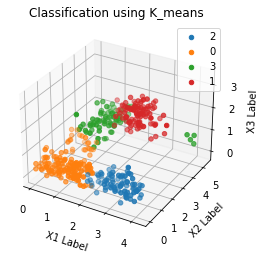

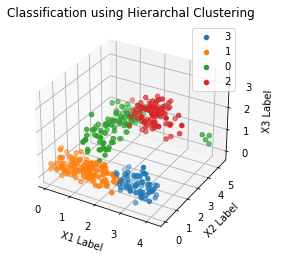

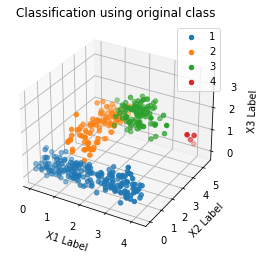

In [136]:
create_K_meanselbow_task1("data/data2.csv")
#call function for hiearchal classification here just like create_kmeanselbow_task1
create_hiearchal_Classification_task1("data/data2.csv")
create_original_3dscatter_task1(pd.read_csv("data/data2.csv"))

C:\Users\hoson\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of Classes: 4
Adjusted Rand Score: 1.0
Normalized Mutual Info Score: 1.0
Adjusted Mutual Info Score: 1.0
Fowlkes Mallows Score: 1.0


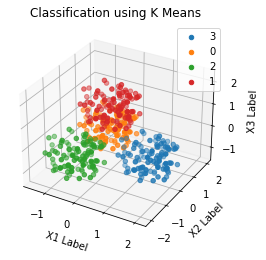

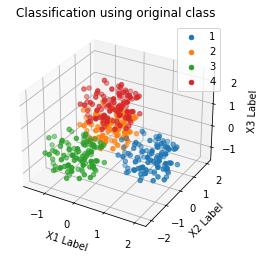

In [109]:
create_K_meanselbow_task1("data/data3.csv")
#call function for hiearchal classification here just like create_kmeanselbow_task1
create_hiearchal_Classification_task1("data/data3.csv")
create_original_3dscatter_task1(pd.read_csv("data/data3.csv"))

C:\Users\hoson\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Number of Classes: 2
Adjusted Rand Score: 0.09272782327563998
Normalized Mutual Info Score: 0.06864017084884316
Adjusted Mutual Info Score: 0.06796683978569128
Fowlkes Mallows Score: 0.5459107296389125


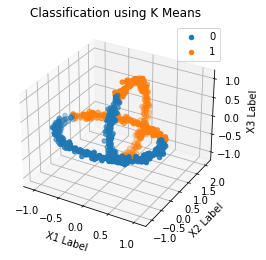

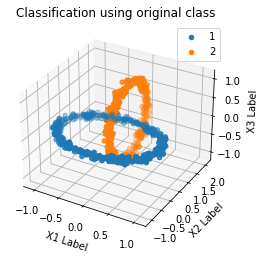

In [110]:
create_K_meanselbow_task1("data/data4.csv")
#call function for hiearchal classification here just like create_kmeanselbow_task1
create_hiearchal_Classification_task1("data/data4.csv")
create_original_3dscatter_task1(pd.read_csv("data/data4.csv"))

C:\Users\hoson\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Number of Classes: 2
Adjusted Rand Score: 0.1885336032086663
Normalized Mutual Info Score: 0.2981230883845461
Adjusted Mutual Info Score: 0.29739914825677755
Fowlkes Mallows Score: 0.6559262338078193


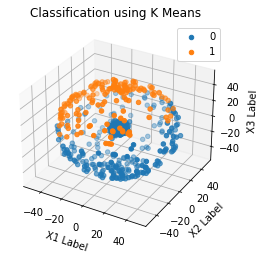

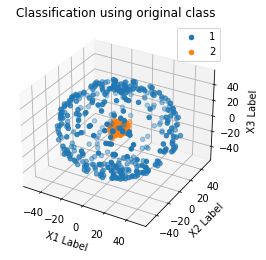

In [111]:
create_K_meanselbow_task1("data/data5.csv")
#call function for hiearchal classification here just like create_kmeanselbow_task1
create_hiearchal_Classification_task1("data/data5.csv")
create_original_3dscatter_task1(pd.read_csv("data/data5.csv"))

Number of Classes: 2
Adjusted Rand Score for  K means : 0.815060637690859
Normalized Mutual Info Score for  K means : 0.7296025389701776
Adjusted Mutual Info Score for  K means : 0.7295548463219651
Fowlkes Mallows Score for  K means : 0.9076346454086384
Adjusted Rand Score for  Hierarchal Clustering : 0.7184533725930805
Normalized Mutual Info Score for  Hierarchal Clustering : 0.6469787065794292
Adjusted Mutual Info Score for  Hierarchal Clustering : 0.6469161701126438
Fowlkes Mallows Score for  Hierarchal Clustering : 0.8602399807978651


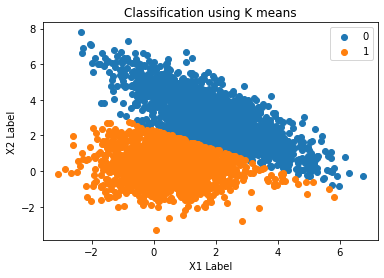

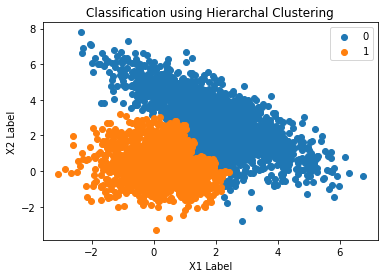

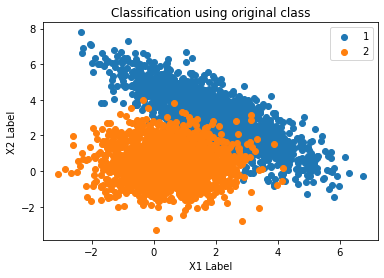

In [132]:
def create_K_meanselbow_task1_2d(file): #K means classification
    data=pd.read_csv(file)
    coordinates=data[[data.columns[1],data.columns[2]]]
    inertia=[]
    for i in range(1,10):
        k_means=KMeans(n_clusters=i,init='k-means++',random_state=42)
        k_means.fit(coordinates)
        inertia.append(k_means.inertia_)

    dydx=[]
    numclass=max(list(data['Class']))
    print('Number of Classes:',numclass)
    opt_k=KMeans(n_clusters=numclass,init='k-means++',random_state=42)
    metrics=opt_k.fit_predict(coordinates)
    data['cluster_class']=metrics
    validate_Supervised(data)
    create_2dscatter(data)
    return data
def create_hiearchal_Classification_task1_2d(file):
    data=pd.read_csv(file)
      
    coordinates=data.iloc[:,1:3]
    numclass=max(list(data['Class']))
    clusters=AgglomerativeClustering(n_clusters=numclass,affinity='euclidean',linkage='ward')
    
    data['cluster_class']=clusters.fit_predict(coordinates)
    create_2dscatter(data, "Hierarchal Clustering")
    validate_Supervised(data,"Hierarchal Clustering")
    return data
def create_2dscatter(data, method='K means'):    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title("Classification using "+method)
    for i in data.cluster_class.unique():
        data2=data.loc[data['cluster_class']==i]
        ax.scatter(data2[data.columns[1]], data2[data.columns[2]],label=i)
    ax.set_xlabel(data.columns[1]+' Label')
    ax.set_ylabel(data.columns[2]+' Label')
    ax.legend()    
def create_original_2dscatter_task1(data):
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    ax2.set_title("Classification using original class")
    for i in data['Class'].unique():
        data2=data.loc[data['Class']==i]
        ax2.scatter(data2[data.columns[1]], data2[data.columns[2]],label=i)
    ax2.set_xlabel(data.columns[1]+' Label')
    ax2.set_ylabel(data.columns[2]+' Label')
    ax2.legend()
    
create_K_meanselbow_task1_2d("data/data6.csv")
#call function for hiearchal classification here just like create_kmeanselbow_task1
create_hiearchal_Classification_task1_2d("data/data6.csv")
create_original_2dscatter_task1(pd.read_csv("data/data6.csv"))

C:\Users\hoson\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Number of Classes: 6
Adjusted Rand Score for  K means : 0.6354381101871709
Normalized Mutual Info Score for  K means : 0.6365532632828066
Adjusted Mutual Info Score for  K means : 0.6315785106497546
Fowlkes Mallows Score for  K means : 0.7927128692157276
Adjusted Rand Score for  Hierarchal Clustering : 0.6387791202472747
Normalized Mutual Info Score for  Hierarchal Clustering : 0.63864636124216
Adjusted Mutual Info Score for  Hierarchal Clustering : 0.6337179256190638
Fowlkes Mallows Score for  Hierarchal Clustering : 0.7948341762290656


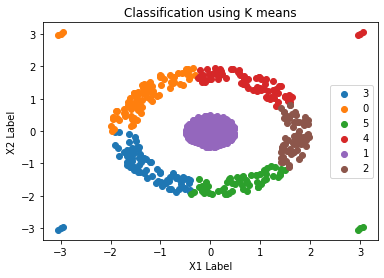

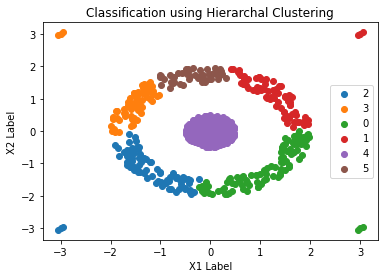

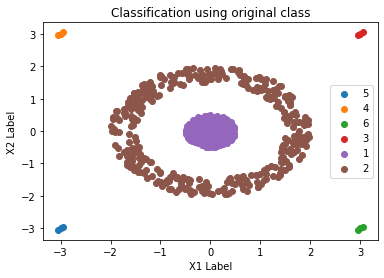

In [134]:
create_K_meanselbow_task1_2d("data/data7.csv")
#call function for hiearchal classification here just like create_kmeanselbow_task1
create_hiearchal_Classification_task1_2d("data/data7.csv")
create_original_2dscatter_task1(pd.read_csv("data/data7.csv"))


Number of Classes: 1
Adjusted Rand Score for  K means : 1.0
Normalized Mutual Info Score for  K means : 1.0
Adjusted Mutual Info Score for  K means : 1.0
Fowlkes Mallows Score for  K means : 1.0
Adjusted Rand Score for  Hierarchal Clustering : 1.0
Normalized Mutual Info Score for  Hierarchal Clustering : 1.0
Adjusted Mutual Info Score for  Hierarchal Clustering : 1.0
Fowlkes Mallows Score for  Hierarchal Clustering : 1.0


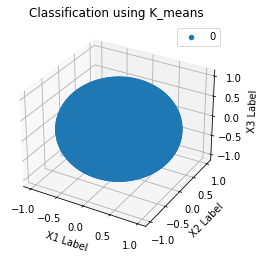

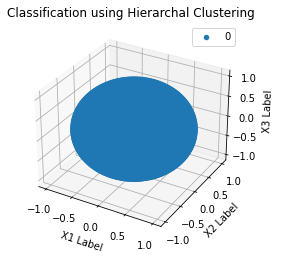

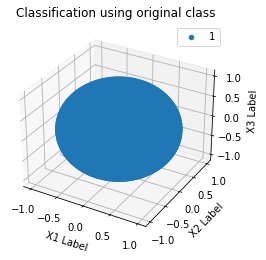

In [135]:
create_K_meanselbow_task1("data/data8.csv")
#call function for hiearchal classification here just like create_kmeanselbow_task1
create_hiearchal_Classification_task1("data/data8.csv")
create_original_3dscatter_task1(pd.read_csv("data/data8.csv"))

Task 2:

In [115]:
def intervention(indicies): #You will probably need this????
    interevent=[]
    for i in range(0,len(indicies)):
        if i==0:
            interevent.append(0)
        else:
            interevent.append(abs(indicies[i]-indicies[i-1]))
    return interevent
def create_K_meanselbow_task2(file):
    #Write code to do K means algo for task 2 here
    data=pd.read_csv(file)
    return data
def create_Hiearchal_task2(file):
    #Write code to do hiearchal classification for task 2 here
    data=pd.read_csv(file)
    return data
def validate_Kmeans_Unsupervised(data):
    #write code to find Internal Validation scores here
    print('Todo!')